<a href="https://colab.research.google.com/github/eea2003/DSA210-PROJECT/blob/main/Smoking_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

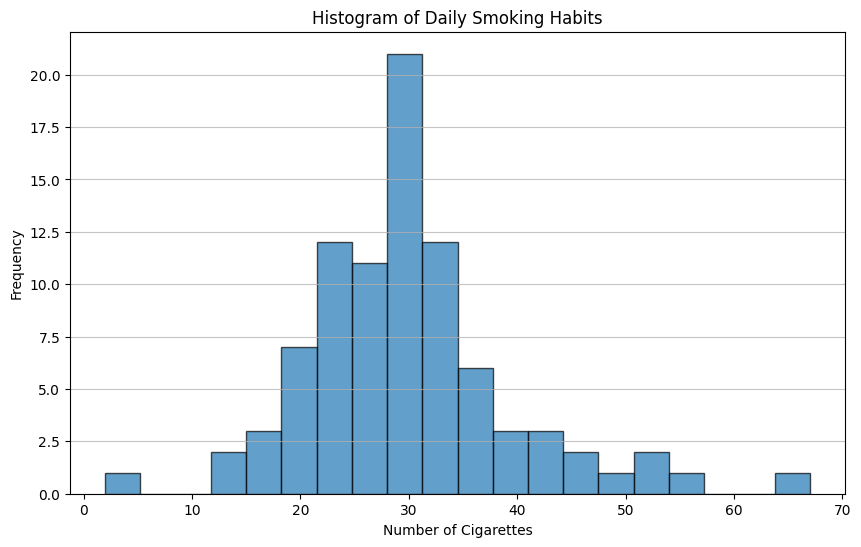

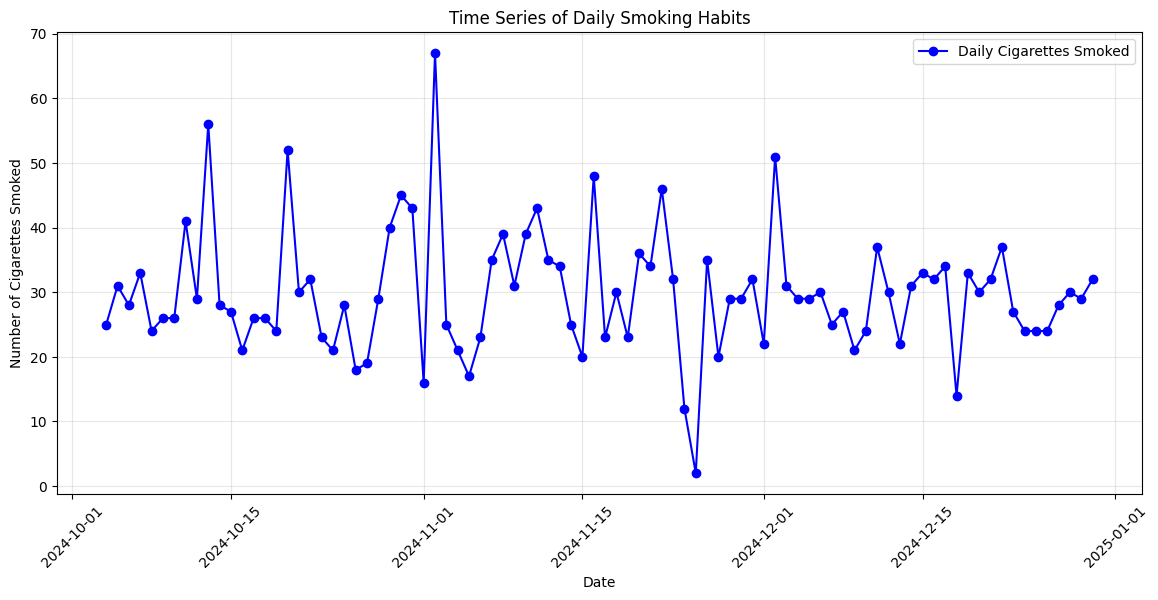

In [1]:

import pandas as pd
import matplotlib.pyplot as plt



smoking_data = pd.read_csv("Smoking_Habits_Data__Year_2024_.csv")


smoking_data.columns = smoking_data.iloc[0]
smoking_data = smoking_data[1:]
smoking_data.columns = ["Date", "Cigarettes_Smoked", "Special_Day_Flag", "Special_Day_Type"]
smoking_data["Date"] = pd.to_datetime(smoking_data["Date"], errors='coerce')
smoking_data["Cigarettes_Smoked"] = pd.to_numeric(smoking_data["Cigarettes_Smoked"], errors='coerce')


plt.figure(figsize=(10, 6))
plt.hist(smoking_data["Cigarettes_Smoked"].dropna(), bins=20, alpha=0.7, edgecolor='black')
plt.title('Histogram of Daily Smoking Habits')
plt.xlabel('Number of Cigarettes')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


plt.figure(figsize=(14, 6))
smoking_data_sorted = smoking_data.sort_values("Date")
plt.plot(
    smoking_data_sorted["Date"],
    smoking_data_sorted["Cigarettes_Smoked"],
    marker='o',
    linestyle='-',
    color='blue',
    label="Daily Cigarettes Smoked"
)
plt.title("Time Series of Daily Smoking Habits")
plt.xlabel("Date")
plt.ylabel("Number of Cigarettes Smoked")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

Unique values in 'Special_Day_Type': ['Regular Day' 'Birthday' 'Birthday ' ' Exam' ' Halloween' ' Preparation'
 ' Exam ' 'Christmas ']
Exam and Preparation rows:
          Date  Cigarettes_Smoked  Special_Day_Flag Special_Day_Type
27 2024-10-31               43.0              True             Exam
33 2024-11-06               23.0              True      Preparation
34 2024-11-07               35.0              True      Preparation
35 2024-11-08               39.0              True      Preparation
36 2024-11-09               31.0              True      Preparation
37 2024-11-10               39.0              True             Exam
38 2024-11-11               43.0              True      Preparation
39 2024-11-12               35.0              True             Exam
40 2024-11-13               34.0              True      Preparation
41 2024-11-14               25.0              True      Preparation
47 2024-11-20               36.0              True      Preparation
48 2024-11-21        

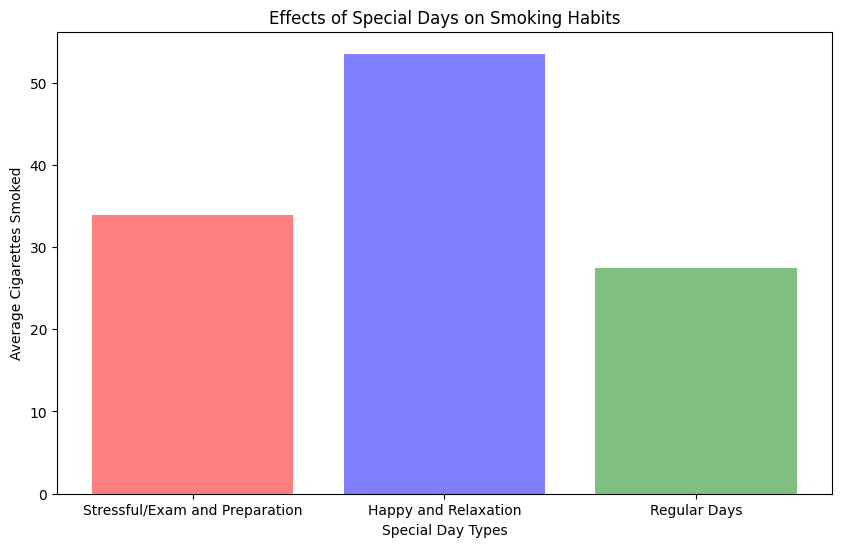

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "Smoking_Habits_Data__Year_2024_.csv"
smoking_data = pd.read_csv(file_path, header=1)


smoking_data.columns = ["Date", "Cigarettes_Smoked", "Special_Day_Flag", "Special_Day_Type"]

smoking_data["Date"] = pd.to_datetime(smoking_data["Date"])
smoking_data["Special_Day_Flag"] = smoking_data["Special_Day_Flag"].astype(bool)
smoking_data["Special_Day_Type"] = smoking_data["Special_Day_Type"].fillna("Regular Day")


print("Unique values in 'Special_Day_Type':", smoking_data["Special_Day_Type"].unique())

exam_days = [" Exam", " Preparation"]
happy_relaxation_days = ["Christmas", "Halloween", "Birthday", "Christmas"]

exam_effect = smoking_data[
    (smoking_data["Special_Day_Flag"] == True) &
    (smoking_data["Special_Day_Type"].isin(exam_days))
]

print("Exam and Preparation rows:\n", exam_effect)

exam_effect_mean = exam_effect["Cigarettes_Smoked"].mean()


happy_relaxation_effect = smoking_data[
    (smoking_data["Special_Day_Flag"] == True) &
    (smoking_data["Special_Day_Type"].isin(happy_relaxation_days))
]
happy_relaxation_effect_mean = happy_relaxation_effect["Cigarettes_Smoked"].mean()


regular_day_effect = smoking_data[smoking_data["Special_Day_Type"] == "Regular Day"]
regular_day_effect_mean = regular_day_effect["Cigarettes_Smoked"].mean()

plt.figure(figsize=(10, 6))
plt.bar(
    ["Stressful/Exam and Preparation", "Happy and Relaxation", "Regular Days"],
    [exam_effect_mean, happy_relaxation_effect_mean, regular_day_effect_mean],
    color=["red", "blue", "green"],
    alpha=0.5
)
plt.title("Effects of Special Days on Smoking Habits")
plt.xlabel("Special Day Types")
plt.ylabel("Average Cigarettes Smoked")
plt.show()